In [37]:
import API_tools as api
import load_data as ld
import unit_conversion as uc
from datetime import datetime as dt
from datetime import timedelta as timedelta
import matplotlib.pyplot as plt
import functions.data_processing as dp
from utils_new import align_and_resample
import pandas as pd

In [38]:
sensor = api.load_csv("linkoping2_NO.csv")
sensor = dp.remove_outliers(sensor)
ref, ref_units = ld.load_slb_data("data/refdata/linkoping-kvartar")

for gas in ["NO","NO2","O3","CO"]:
    ref, ref_units = uc.df_ugm3_to_ppb(ref,ref_units,"NO")


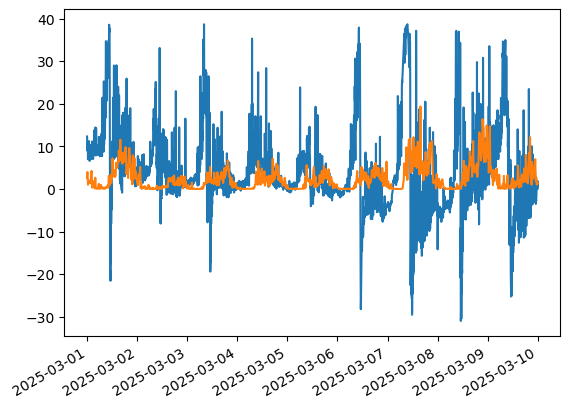

In [39]:
start = dt(2025,3,1)
end = dt(2025,3,10)
sensor_test = sensor[start:end]
ref = ref[start:end]
sensor_test["NO"].plot()
ref["NO"].plot()
plt.show()

472
481
480
355
289
288
355
473
480


/tmp/ipykernel_14876/4252715182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_test["NO_test"] = sensor_test["NO_raw"]
/tmp/ipykernel_14876/4252715182.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the ass

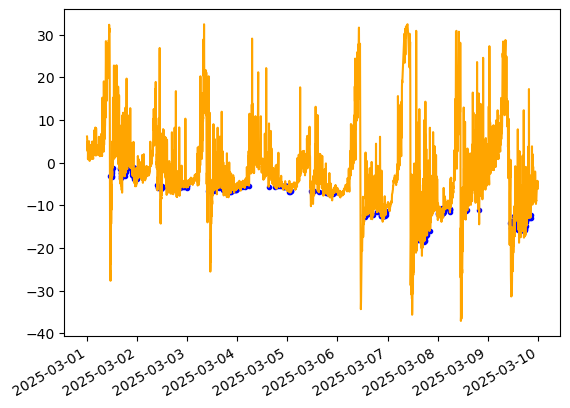

In [49]:
sensor_test["NO_test"] = sensor_test["NO_raw"]
dates = pd.date_range(start=start,end=end,freq='D')
for i in range(len(dates[:-1])):
    curr_data = sensor_test[dates[i]:dates[i+1]]
    N=len(curr_data)
    print(N)
    base_points = curr_data.nsmallest(int(N/5),["NO_raw"])[int(N/10):]
    offset = base_points["NO_raw"].mean()
    sensor_test["NO_test"][dates[i]:dates[i+1]] -= offset
    base_points["NO_raw"].plot(style=".",color='blue')
sensor_test["NO_raw"].plot(color='orange')
plt.show()

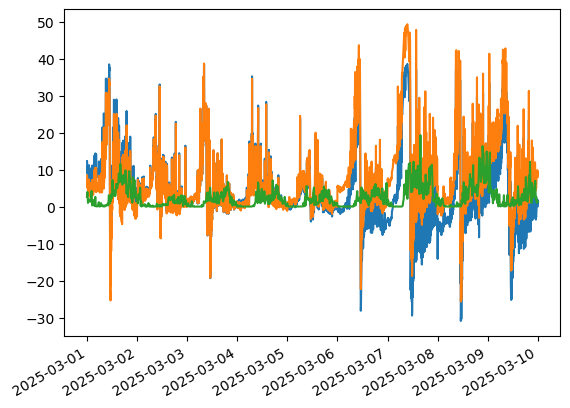

In [50]:
sensor_test["NO"].plot()
sensor_test["NO_test"].plot()
ref["NO"].plot()
plt.show()

